In [191]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [192]:
train_df= pd.read_csv(r"C:\Users\nikitcha\Desktop\Code Nest\LogisticRegression-20190901T055138Z-001\LogisticRegression\Titanic Project\titanic_train.csv")

In [193]:
test_df=pd.read_csv(r"C:\Users\nikitcha\Desktop\Code Nest\LogisticRegression-20190901T055138Z-001\LogisticRegression\Titanic Project\test.csv")

In [194]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [195]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [196]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [197]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [198]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Burke, Mr. Jeremiah",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


# correlation Martix

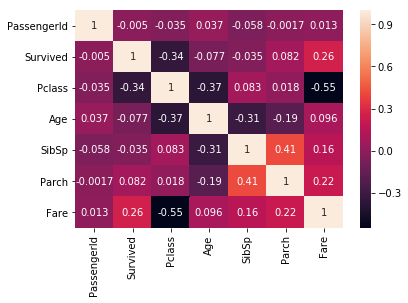

In [199]:
sns.heatmap(train_df.corr(),annot=True)

# Checking Features related to Survived

In [200]:
train_df[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [201]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [202]:
train_df[['SibSp','Survived']].groupby(['Survived']).mean().sort_values(by='Survived',ascending=False)

,SibSp
Survived,
1,0.473684
0,0.553734


In [203]:
train_df[['Parch','Survived']].groupby(['Survived']).mean().sort_values(by='Survived',ascending=False)

,Parch
Survived,
1,0.464912
0,0.329690


# Null Values in Training and Testing Dataset

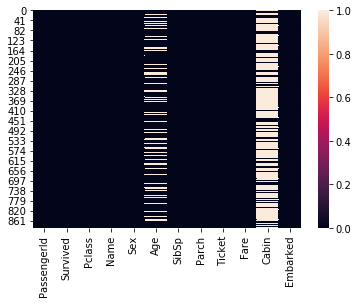

In [204]:
sns.heatmap(train_df.isnull())

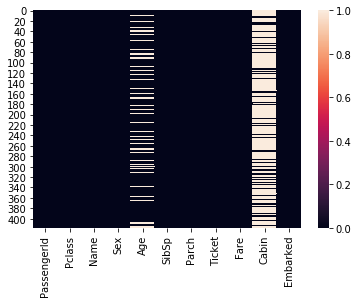

In [205]:
sns.heatmap(test_df.isnull())

# Ticket (Not used for prediction) Cabin(many null values which we can't fill)
** Drop these 2 features from train and test data

In [206]:
train_df=train_df.drop(['Ticket','Cabin'],axis=1)

In [207]:
test_df=test_df.drop(['Ticket','Cabin'],axis=1)

# Fetch Title from Name 
fetch all unique titles and map it with 0,1,2,3,4,5 in train and test data

In [208]:
train_df['Title']= train_df.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [209]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [210]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [211]:
train_df['Title']=train_df['Title'].replace(['Mlle'],['Miss'])
train_df['Title']=train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Miss')
train_df['Title']=train_df['Title'].replace(['Ms'],['Miss'])
train_df['Title']=train_df['Title'].replace(['Mme'],['Mrs'])

In [212]:
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [213]:
test_df['Title']= test_df.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [214]:
test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [215]:
test_df['Title']=test_df['Title'].replace(['Mlle'],['Miss'])
test_df['Title']=test_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Miss')
test_df['Title']=test_df['Title'].replace(['Ms'],['Miss'])
test_df['Title']=test_df['Title'].replace(['Mme'],['Mrs'])

In [216]:
test_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [217]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

In [218]:
train_df['Title'] = train_df['Title'].map(title_mapping)

In [219]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [220]:
test_df['Title']=test_df['Title'].map(title_mapping)

In [221]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3


## We have Fetched the Title so now we can drop Name

In [222]:
train_df = train_df.drop(['Name'],axis=1)

In [223]:
test_df=test_df.drop(['Name'],axis=1)

# Map sex with 0 and 1 in test and train data

In [224]:
sex_mapping={"male":0,"female":1}

In [225]:
train_df['Sex']=train_df['Sex'].map(sex_mapping)

In [226]:
test_df['Sex']=test_df['Sex'].map(sex_mapping)

In [227]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,3
2,3,1,3,1,26.0,0,0,7.9250,S,2
3,4,1,1,1,35.0,1,0,53.1000,S,3
4,5,0,3,0,35.0,0,0,8.0500,S,1


In [228]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,1
1,893,3,1,47.0,1,0,7.0000,S,3
2,894,2,0,62.0,0,0,9.6875,Q,1
3,895,3,0,27.0,0,0,8.6625,S,1
4,896,3,1,22.0,1,1,12.2875,S,3


# Passenger ID is not useful for prediction so we can drop it

In [229]:
train_df=train_df.drop(['PassengerId'],axis=1)

In [230]:
test_df=test_df.drop(['PassengerId'],axis=1)

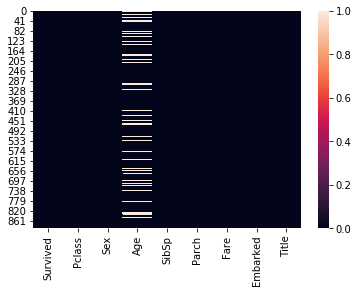

In [231]:
sns.heatmap(train_df.isnull())

# Working with Embarked 
filling the null value and mapping with 0,1,2,3

In [232]:
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
61,1,1,1,38.0,0,0,80.0,NaN,2
829,1,1,1,62.0,0,0,80.0,NaN,3


# Find mode of embarked and fill the null value with the value which is most frequently ouccuring

In [233]:
freq = train_df['Embarked'].mode()

In [234]:
freq

0    S
dtype: object

In [235]:
train_df['Embarked']=train_df['Embarked'].fillna(value='S')


In [236]:
train_df[train_df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [237]:
test_df[test_df['Embarked'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title


## Mapping the Embarked feature with 0,1,2

In [238]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [239]:
Embarked_map ={"S":0,"C":1,"Q":2}

In [240]:
train_df['Embarked']=train_df['Embarked'].map(Embarked_map)

In [241]:
test_df['Embarked']=test_df['Embarked'].map(Embarked_map)

In [242]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,3
4,0,3,0,35.0,0,0,8.0500,0,1


In [243]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,2,1
1,3,1,47.0,1,0,7.0000,0,3
2,2,0,62.0,0,0,9.6875,2,1
3,3,0,27.0,0,0,8.6625,0,1
4,3,1,22.0,1,1,12.2875,0,3


### Feting the Mean Age basis of Pclass and impute that age against null values in dataset

In [244]:
train_df[['Pclass','Age']].groupby(['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [245]:
def imputeage(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 38
        elif Pclass ==2:
            return 29
        else:
            return 25
    else:
        return Age

In [246]:
train_df['Age']=train_df[['Age','Pclass']].apply(imputeage,axis=1)

In [247]:
test_df['Age']=test_df[['Age','Pclass']].apply(imputeage,axis=1)

In [248]:
train_df[train_df['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title


In [249]:
test_df[test_df['Age'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title


### Creating the AgeBand and map the age to 0,1,2,3,4

In [250]:
train_df['AgeBand']=pd.cut(train_df['Age'],5)

In [251]:
test_df['AgeBand']=pd.cut(test_df['Age'],5)

In [252]:
train_df['AgeBand'].unique()

[(16.336, 32.252], (32.252, 48.168], (48.168, 64.084], (0.34, 16.336], (64.084, 80.0]]
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [253]:
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22.0,1,0,7.2500,0,1,"(16.336, 32.252]"
1,1,1,1,38.0,1,0,71.2833,1,3,"(32.252, 48.168]"


In [254]:
test_df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,3,0,34.5,0,0,7.8292,2,1,"(30.502, 45.668]"
1,3,1,47.0,1,0,7.0000,0,3,"(45.668, 60.834]"


In [255]:
combine = [train_df, test_df]

In [256]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']=4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,0,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,1,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,0,2,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,0,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,0,1,"(32.252, 48.168]"


In [257]:
train_df['Age'].unique()

array([1., 2., 3., 0., 4.])

In [260]:
test_df['Age'].unique()

array([2., 3., 1., 0., 4.])

In [261]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,0,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,1,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,0,2,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,0,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,0,1,"(32.252, 48.168]"


In [264]:
test_df['Age']=test_df['Age'].apply(np.int64)

In [265]:
train_df['Age']=train_df['Age'].apply(np.int64)

In [266]:
train_df['Age'].unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [267]:
test_df['Age'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

In [268]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,0,1,"(16.336, 32.252]"
1,1,1,1,2,1,0,71.2833,1,3,"(32.252, 48.168]"
2,1,3,1,1,0,0,7.9250,0,2,"(16.336, 32.252]"
3,1,1,1,2,1,0,53.1000,0,3,"(32.252, 48.168]"
4,0,3,0,2,0,0,8.0500,0,1,"(32.252, 48.168]"


In [269]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,3,0,2,0,0,7.8292,2,1,"(30.502, 45.668]"
1,3,1,2,1,0,7.0000,0,3,"(45.668, 60.834]"
2,2,0,3,0,0,9.6875,2,1,"(60.834, 76.0]"
3,3,0,1,0,0,8.6625,0,1,"(15.336, 30.502]"
4,3,1,1,1,1,12.2875,0,3,"(15.336, 30.502]"


### Create FareBand as new Feature and mapping Fare accordingly

In [271]:
train_df['FareBand']=pd.qcut(train_df['Fare'],4)

In [272]:
test_df['FareBand']=pd.qcut(test_df['Fare'],4)

In [273]:
train_df['FareBand'].unique()

[(-0.001, 7.91], (31.0, 512.329], (7.91, 14.454], (14.454, 31.0]]
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [275]:
train_df.loc[train_df['Fare']<=7.91,'Fare']=0

In [277]:
train_df.loc[((train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454)), 'Fare'] = 1

In [278]:
train_df.loc[((train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31)), 'Fare'] = 2

In [279]:
train_df.loc[ train_df['Fare'] > 31, 'Fare'] = 3

In [280]:
train_df['Fare'] = train_df['Fare'].astype(int)

In [281]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FareBand
0,0,3,0,1,1,0,0,0,1,"(16.336, 32.252]","(-0.001, 7.91]"
1,1,1,1,2,1,0,3,1,3,"(32.252, 48.168]","(31.0, 512.329]"
2,1,3,1,1,0,0,1,0,2,"(16.336, 32.252]","(7.91, 14.454]"
3,1,1,1,2,1,0,3,0,3,"(32.252, 48.168]","(31.0, 512.329]"
4,0,3,0,2,0,0,1,0,1,"(32.252, 48.168]","(7.91, 14.454]"


In [282]:
test_df.loc[test_df['Fare'] <=7.91,'Fare']=0

In [283]:
test_df.loc[((test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454)), 'Fare'] = 1

In [284]:
test_df.loc[((test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31)), 'Fare'] = 2

In [285]:
test_df.loc[ test_df['Fare'] > 31, 'Fare'] = 3

In [289]:
test_df.dropna()
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FareBand
0,3,0,2,0,0,0.0,2,1,"(30.502, 45.668]","(-0.001, 7.896]"
1,3,1,2,1,0,0.0,0,3,"(45.668, 60.834]","(-0.001, 7.896]"
2,2,0,3,0,0,1.0,2,1,"(60.834, 76.0]","(7.896, 14.454]"
3,3,0,1,0,0,1.0,0,1,"(15.336, 30.502]","(7.896, 14.454]"
4,3,1,1,1,1,1.0,0,3,"(15.336, 30.502]","(7.896, 14.454]"


### Checking the null values of Fare feature in test data and drop the null values

In [290]:
test_df[test_df['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FareBand
152,3,0,3,0,0,NaN,0,1,"(45.668, 60.834]",NaN


In [295]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FareBand
0,3,0,2,0,0,0.0,2,1,"(30.502, 45.668]","(-0.001, 7.896]"
1,3,1,2,1,0,0.0,0,3,"(45.668, 60.834]","(-0.001, 7.896]"
2,2,0,3,0,0,1.0,2,1,"(60.834, 76.0]","(7.896, 14.454]"
3,3,0,1,0,0,1.0,0,1,"(15.336, 30.502]","(7.896, 14.454]"
4,3,1,1,1,1,1.0,0,3,"(15.336, 30.502]","(7.896, 14.454]"


In [296]:
test_df[test_df['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FareBand


In [297]:
test_df['Fare'] = test_df['Fare'].astype(int)

In [300]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FareBand
0,0,3,0,1,1,0,0,0,1,"(16.336, 32.252]","(-0.001, 7.91]"
1,1,1,1,2,1,0,3,1,3,"(32.252, 48.168]","(31.0, 512.329]"
2,1,3,1,1,0,0,1,0,2,"(16.336, 32.252]","(7.91, 14.454]"
3,1,1,1,2,1,0,3,0,3,"(32.252, 48.168]","(31.0, 512.329]"
4,0,3,0,2,0,0,1,0,1,"(32.252, 48.168]","(7.91, 14.454]"


In [299]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FareBand
0,3,0,2,0,0,0,2,1,"(30.502, 45.668]","(-0.001, 7.896]"
1,3,1,2,1,0,0,0,3,"(45.668, 60.834]","(-0.001, 7.896]"
2,2,0,3,0,0,1,2,1,"(60.834, 76.0]","(7.896, 14.454]"
3,3,0,1,0,0,1,0,1,"(15.336, 30.502]","(7.896, 14.454]"
4,3,1,1,1,1,1,0,3,"(15.336, 30.502]","(7.896, 14.454]"


### AgeBand and FareBand can be removed now 

In [302]:
train_df = train_df.drop(['AgeBand','FareBand'],axis=1)

In [303]:
test_df = test_df.drop(['AgeBand','FareBand'],axis=1)

### Creating new feature FamilySize using SibSp and Parch feature 

In [304]:
train_df['FamilySize']=train_df['SibSp']+train_df['Parch']+1

In [305]:
test_df['FamilySize']=test_df['SibSp']+test_df['Parch']+1

In [307]:
train_df[['FamilySize','Survived']].groupby(['FamilySize']).mean().sort_values(['Survived'],ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


### Using familySize we can introduce new feature isAlone with value as 0 and 1

In [308]:
train_df['isAlone']=0

In [310]:
train_df.loc[train_df['FamilySize']==1,'isAlone']=1

In [311]:
test_df['isAlone']=0

In [312]:
test_df.loc[test_df['FamilySize']==1,'isAlone']=1

In [313]:
train_df['isAlone'].unique()

array([0, 1], dtype=int64)

In [314]:
test_df['isAlone'].unique()

array([1, 0], dtype=int64)

In [315]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,isAlone
0,0,3,0,1,1,0,0,0,1,2,0
1,1,1,1,2,1,0,3,1,3,2,0
2,1,3,1,1,0,0,1,0,2,1,1
3,1,1,1,2,1,0,3,0,3,2,0
4,0,3,0,2,0,0,1,0,1,1,1


In [316]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,isAlone
0,3,0,2,0,0,0,2,1,1,1
1,3,1,2,1,0,0,0,3,2,0
2,2,0,3,0,0,1,2,1,1,1
3,3,0,1,0,0,1,0,1,1,1
4,3,1,1,1,1,1,0,3,3,0


### Dropping the Features which are not required now

In [318]:
train_df = train_df.drop(['FamilySize','Parch','SibSp'],axis=1)

In [319]:
test_df = test_df.drop(['FamilySize','Parch','SibSp'],axis=1)

In [320]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [321]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Title,isAlone
0,3,0,2,0,2,1,1
1,3,1,2,0,0,3,0
2,2,0,3,1,2,1,1
3,3,0,1,1,0,1,1
4,3,1,1,1,0,3,0


In [322]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
Fare        891 non-null int32
Embarked    891 non-null int64
Title       891 non-null int64
isAlone     891 non-null int64
dtypes: int32(1), int64(7)
memory usage: 52.3 KB


In [323]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null int64
Fare        418 non-null int32
Embarked    418 non-null int64
Title       418 non-null int64
isAlone     418 non-null int64
dtypes: int32(1), int64(6)
memory usage: 21.3 KB


### Creating the model and implementing the model

In [325]:
X = train_df[['Pclass','Sex','Age','Fare','Embarked','Title','isAlone']]

In [326]:
y=train_df[['Survived']]

In [329]:
from sklearn.preprocessing import StandardScaler

In [330]:
from sklearn.linear_model import LogisticRegression

In [332]:
sc_r = StandardScaler()

In [333]:
x_std = sc_r.fit_transform(X)

C:\Users\nikitcha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nikitcha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [334]:
logreg = LogisticRegression()

In [335]:
logreg.fit(X,y)

C:\Users\nikitcha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikitcha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [336]:
Y_pred = logreg.predict(test_df)

In [337]:
acc_log = round(logreg.score(X, y) * 100, 2)
acc_log

81.71

In [338]:
from sklearn.model_selection import cross_val_score

In [339]:
from sklearn.model_selection import cross_val_predict

In [340]:
from sklearn.metrics import confusion_matrix

In [341]:
from sklearn.metrics import precision_score,f1_score,recall_score

In [343]:
res= cross_val_score(logreg,x_std,y,cv=10,scoring='accuracy')

C:\Users\nikitcha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikitcha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nikitcha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikitcha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

In [344]:
print("Average Accuracy: {0:.4f}".format(np.mean(res)))

Average Accuracy: 0.8059


In [345]:
print ("Std Accuracy : {0:.4f}".format(np.std(res)))

Std Accuracy : 0.0290


In [348]:
y_train_pred = cross_val_predict(logreg,x_std,y,cv=3)

C:\Users\nikitcha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikitcha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nikitcha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\nikitcha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exampl

In [349]:
confusion_matrix(y_train_pred,y)

array([[480, 104],
       [ 69, 238]], dtype=int64)

In [350]:
print("precision score : {0:.4f}".format(precision_score(y,y_train_pred,average="weighted")))

precision score : 0.8040


In [351]:
print("recall score : {0:.4f}".format(recall_score(y,y_train_pred,average='weighted')))

recall score : 0.8058


In [352]:
print("F1 Score : {0:.4f}".format(f1_score(y,y_train_pred,average='weighted')))

F1 Score : 0.8036


In [354]:
test_df=pd.read_csv(r"C:\Users\nikitcha\Desktop\Code Nest\LogisticRegression-20190901T055138Z-001\LogisticRegression\Titanic Project\test.csv")

In [356]:
submission = pd.DataFrame(
   { 
    'PassengerId' : test_df["PassengerId"],
    'Survived' : Y_pred
   },
    columns=['PassengerId','Survived']
)

In [357]:
submission.to_csv('submission.csv',index=False)

In [358]:
submission_df = pd.read_csv(r'C:\Users\nikitcha\Desktop\Code Nest\LogisticRegression-20190901T055138Z-001\LogisticRegression\submission.csv')

In [359]:
!dir

 Volume in drive C is OSDisk
 Volume Serial Number is B4E6-B4B8

 Directory of C:\Users\nikitcha\Desktop\Code Nest\LogisticRegression-20190901T055138Z-001\LogisticRegression

09/13/2019  02:23 PM    <DIR>          .
09/13/2019  02:23 PM    <DIR>          ..
09/13/2019  12:31 PM    <DIR>          .ipynb_checkpoints
09/01/2019  11:22 AM           107,424 advertising.csv
09/01/2019  11:22 AM    <DIR>          img
09/13/2019  12:32 PM           402,453 Kaggle Project Practice.ipynb
09/01/2019  11:22 AM           786,593 Logistic Regression Project Overview.html
09/01/2019  11:22 AM           537,558 Logistic Regression Project Overview.ipynb
09/01/2019  11:22 AM           792,684 Logistic Regression Project Solution.html
09/01/2019  11:22 AM           538,482 Logistic Regression Project Solution.ipynb
09/01/2019  11:22 AM           302,929 Logistic Regression.html
09/01/2019  01:12 PM            40,430 Logistic Regression.ipynb
09/01/2019  12:21 PM           215,686 Logistic Regression.ppt